In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Случайная величина, моделирующая распределение Bi(5, 0.5)

In [3]:
def Y():
    #ans = 0;
    
    tmp = np.random.random(size = 5)
    for i in range(5):
        # Непрерывность слева
        if tmp[i] >= 0.5:
            tmp[i] = 1;
        else:
            tmp[i] = 0;
    
    return tmp.sum()

In [12]:
def Task1(len = 100):
    a = np.zeros((len))
    for i in range(len):
        a[i] = Y()
    
    b = np.random.binomial(5, 0.5, (len))
    plt.plot(a)
    plt.plot(b)
    plt.title("Выборка длины "+str(len))
    plt.savefig("./Task_1__all_"+str(len)+'.png')
    plt.show()
    
    own = np.zeros((6))
    for i in range(len):
        own[int(a[i])] += 1

    own /= len

    binom = np.zeros((6))
    for i in range(len):
        binom[int(b[i])] += 1

    binom /= len
    
    plt.plot(own)
    plt.plot(binom)
    plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])
    plt.title("Биномиальное распределение длины "+str(len))
    plt.savefig("./Task_1_Binom"+str(len)+".png")
    plt.show()

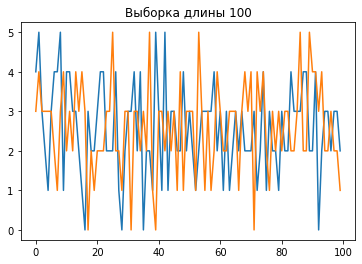

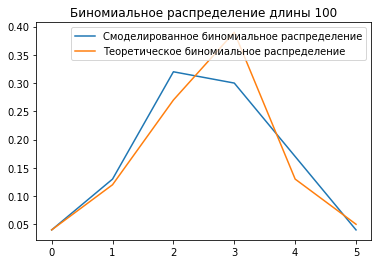

In [13]:
Task1()

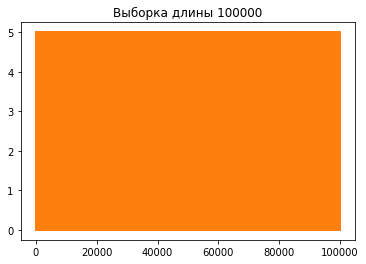

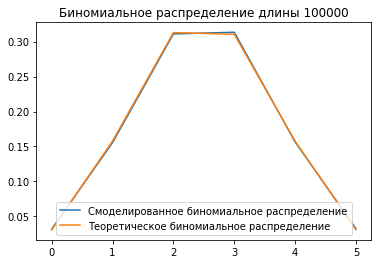

In [14]:
Task1(100000)

<function matplotlib.pyplot.show(close=None, block=None)>

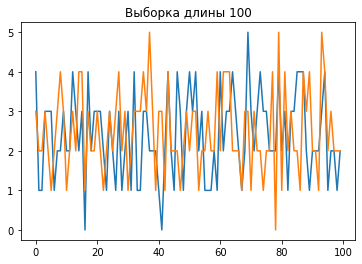

In [10]:
a = np.zeros((100))
for i in range(100):
    a[i] = Y()

b = np.random.binomial(5, 0.5, (100))
plt.plot(a)
plt.plot(b)
plt.title("Выборка длины 100")
plt.savefig("./Task_1__all_100.png")
plt.show

In [7]:
own = np.zeros((6))
for i in range(100):
    own[int(a[i])] += 1

own /= 100

binom = np.zeros((6))
for i in range(100):
    binom[int(b[i])] += 1

binom /= 100

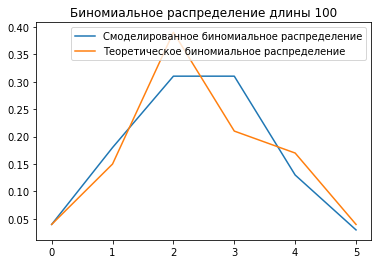

In [8]:
plt.plot(own)
plt.plot(binom)
plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])
plt.title("Биномиальное распределение длины 100")
plt.savefig("./Task_1_Binom100")

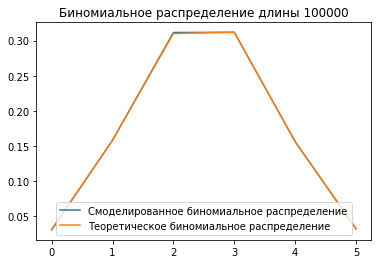

In [11]:
a1 = np.zeros((100000))
for i in range(100000):
    a1[i] = Y()

b1 = np.random.binomial(5, 0.5, (100000))

own1 = np.zeros((6))
for i in range(100000):
    own1[int(a1[i])] += 1

own1 /= 100000

binom1 = np.zeros((6))
for i in range(100000):
    binom1[int(b1[i])] += 1

binom1 /= 100000

plt.plot(own1)
plt.plot(binom1)
plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])
plt.title("Биномиальное распределение длины 100000")
plt.savefig("./Task_1_Binom100000")

## Выборочное среднее и дисперсия

### Выборочное среднее

#### Смоделированная

In [ ]:
s = a.sum() / 100
print(s)

2.52


#### Теоретическая

In [ ]:
s_bin = b.sum() / 100
print(s_bin)

2.49


In [ ]:
s1 = a1.sum() / 100000
print(s1)


s_bin1 = b1.sum() / 100000
print(s_bin1)

2.50447
2.50702


### Дисперсия

#### Смоделированная

In [ ]:
s_sqrt = (a*a).sum()/100
disp = s_sqrt - s**2
print(disp)

1.5295999999999994


#### Теоретическая

In [ ]:
s_bin_sqrt = (b*b).sum()/100
disp_bin = s_bin_sqrt - s_bin**2
print(disp_bin)

1.1698999999999993


In [ ]:
s_sqrt1 = (a1*a1).sum()/100000
disp1 = s_sqrt1 - s1**2
print(disp1)


s_bin_sqrt1 = (b1*b1).sum()/100000
disp_bin1 = s_bin_sqrt1 - s_bin1**2
print(disp_bin1)

1.2396000191
1.260650719600001


# Задание 2
# Стандартное распределение Коши C(0, 1)

In [ ]:
def C():
    return np.tan(np.pi*(np.random.random() - 0.5))

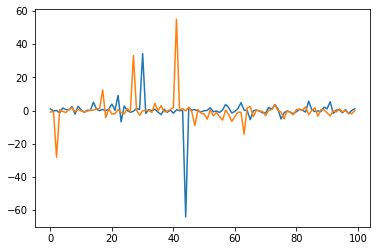

In [ ]:
c = np.zeros((100))
for i in range(100):
    c[i] = C()

d_cauch = np.random.standard_cauchy(size = (100))

plt.plot(c)
plt.plot(d_cauch)

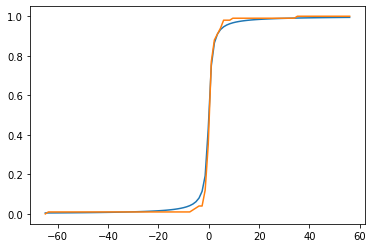

In [ ]:
start = int(min(c.min(), d_cauch.min())) - 1
stop = int(max(c.max(), d_cauch.max())) + 1
x = np.linspace(start = start, stop = stop, num = 100)

y_cauchy = lambda x: 1/np.pi * np.arctan(x) + 0.5
def emper(x, c = c):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

#y_emp_c = lambda x: emper(x)
plt.plot(x, y_cauchy(x))
plt.plot(x, emper(x))

### Гистограмма и теоретическая плотность

Для определения числа разрядов используем правило Стерджиса: n = 1+[log2N], где N = 100 или N = 100000

In [ ]:
def n(N = 100):
    return int(np.sqrt(N))
    #return 1 + int(np.log2(N))

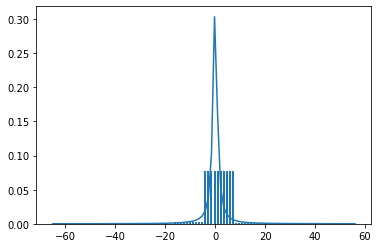

In [ ]:
n_c = n()
hist_len = (x.max() - x.min())/(n_c)
mas = np.zeros((n_c+1))

for i in range(n_c):
    mas[i] = x.min() + hist_len*i
mas[n_c] = x.max()
result = np.zeros((n_c))
for i in range(len(c)):
    for j in range(n_c):
        if c[i] <= mas[j+1] and c[i] > mas[j]:
            result[j] += 1

def h(x):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j]
    
    ans /= (hist_len*100)
    return ans

#fig, ax = plt.subplots()
plt.bar(x, h(x), width = 0.01)

f = lambda x: 1/np.pi * (1/(x**2 + 1))

plt.plot(x, f(x))
#plt.legend(["Гистограмма", "Плотность"])
plt.show()

### Выборочная медиана и теоретическое значение

In [ ]:
F_T = lambda x: np.tan(np.pi*(x-0.5))

In [ ]:
print("Теоретическое значение: ", F_T(0.5))
print("Выборочная медиана: ", np.sort(c)[49])

Теоретическое значение:  0.0
Выборочная медиана:  -0.02639093513211807


# Задание 3
# Использование задачи 8

In [ ]:
def R(a, b):
    #return a + np.random.sample() * (b-a)
    return np.random.uniform(low = a, high = b)

In [ ]:
print(np.random.uniform(low = -8, high = -3))

-3.6583855725950203


In [ ]:
def E():
    el = np.random.sample()
    
    if el < 0:
        return 0
    elif el < 5/16:
        return el*16 - 8 #(1/5 * R(-8, -3))
    elif el < 7/16:
        return el*16 - 5 - 3 #(1/5 * R(-3, -1))
    elif el < 11/16:
        return el*16 - 7 - 1 #(1/5 * R(-1, 3))
    elif el < 12/16:
        return el*16 - 11 + 3 #(1/5 * R(3, 4))
    elif el < 1:
        return el*16 - 12 - 4 #(1/5 * R(a = 4, b = 8))
    
    return 0
    
    #return R(-8, -3)#1/5 * (R(-8,-3)+R(-3, -1)+R(-1, 3)+R(3,4)+R(4,8))

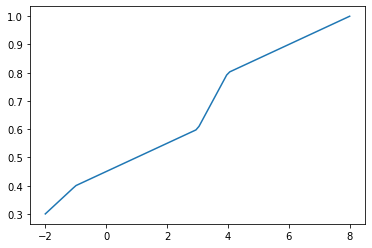

In [ ]:
e = np.zeros((100))

for i in range(100):
    e[i] = E()
#print(np.sort(e))
def func(x):
    ans = np.zeros_like(x)
    
    a = 1/5
    b = 0
    for i in range(len(ans)):
        if x[i] < -8:
            b = 0
        elif x[i] < -3:
            b = 1/25 * (x[i] + 8)
        elif x[i] < -1:
            b = 1/5 + 1/10 * (x[i] + 3)
        elif x[i] < 3:
            b = 2/5 + 1/20 * (x[i] + 1) 
        elif x[i] < 4:
            b = 3/5 + 1/5 * (x[i] - 3)
        elif x[i] < 8:
            b = 4/5 + 1/20 * (x[i] - 4)
        else:
            b = 1
        ans[i] = b
        b = 0
    return ans
start_8 = int(e.min()+5)
stop_8 = int(e.max()+5)
    
x_8 = np.linspace(start = start_8, stop = stop_8, num = 100)

plt.plot(x_8, func(x_8))

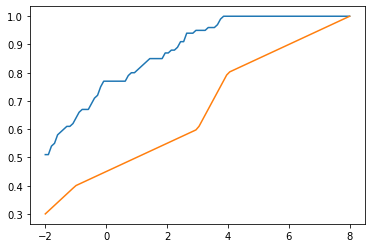

In [ ]:
def emper1(x, c = e):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

plt.plot(x_8, emper1(x_8))
plt.plot(x_8, func(x_8))

In [2]:
# 5/16 2/16 3/16 1/16 5/16
# 1    0.5  2/3  2    6/5
def Gen():
    sector = np.random.uniform()

    position = np.random.uniform()

    #return position * sector
    if sector < 5/16:
        return position * 5/16 
    elif sector < 6/16:
        return position * 2/16 + 5/16
    elif sector < 8/16:
        return position * 3/16 + 7/16
    elif sector < 10/16:
        return position * 1/16 + 10/16
    elif sector < 1:
        return position * 5/16 + 11/16
    
    return 0

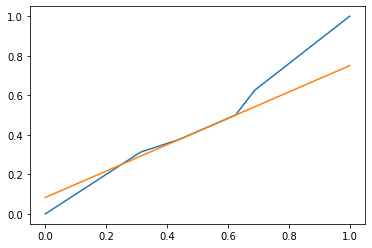

In [35]:
e = np.zeros((1000))

for i in range(1000):
    e[i] = Gen()

def func1(x):
    ans = np.zeros_like(x)
    
    a = 1/5
    b = 0
    for i in range(len(ans)):
        if x[i] < 0:
            b = 0
        elif x[i] < 5/16:
            b = x[i]
        elif x[i] < 7/16:
            b = 5/16 + 1/2 * (x[i] - 5/16)
        elif x[i] < 10/16:
            b = 6/16 + 2/3 * (x[i] - 7/16) 
        elif x[i] < 11/16:
            b = 8/16 + 2 * (x[i] - 10/16)
        elif x[i] < 1:
            b = 10/16 + 6/5 * (x[i] - 11/16)
        else:
            b = 1
        ans[i] = b
        b = 0
    return ans
start_8 = 1.5
stop_8 = -0.5
    
x_8 = np.linspace(start = 0.0, stop = 1.0, num = 1000)

plt.plot(x_8, func1(x_8))
test_func = lambda x: 2/3 * x  + 4/48
plt.plot(x_8, test_func(x_8))

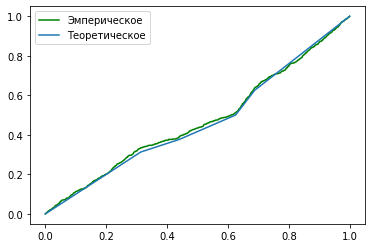

In [40]:
def emper1(x, c = e):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

emper_distrib = emper1(x_8)
theory_distrib = func1(x_8)
plt.plot(x_8, emper_distrib, color = "green")
plt.plot(x_8, func1(x_8))
plt.legend(["Эмперическое", "Теоретическое"])

# Выборочное среднее и теоретическое среднее

In [16]:
E_emper = emper_distrib.sum()/1000
E_theor = theory_distrib.sum()/1000
print("Emper mean: " + str(E_emper))
print("Theor mean: " + str(E_theor))

Emper mean: 0.473579
Theor mean: 0.4691064564564565


# Дисперсии

In [17]:
E_emper2 = (emper_distrib*emper_distrib).sum()/1000
E_theor2 = (theory_distrib*theory_distrib).sum()/1000
D_emper = E_emper2 - E_emper**2
D_theor = E_theor2 - E_theor**2
print("Emper disp: " + str(D_emper))
print("Theor disp: " + str(D_theor))

Emper disp: 0.10613546175899993
Theor disp: 0.10589187234485739


# Гистограмма

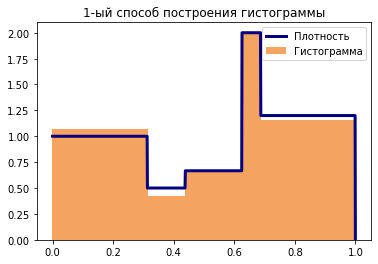

In [69]:
n_c = 5
hist_len = (x_8.max() - x_8.min())/(n_c)
mas = np.array([0, 5/16, 7/16, 10/16, 11/16, 1])

result = np.zeros((n_c))

for i in range(len(e)):
    for j in range(n_c):
        if e[i] <= mas[j+1] and e[i] > mas[j]:
            result[j] += 1
# TODOOOOOO
def h(x):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j] / (mas[j+1] - mas[j])
    
    ans /= 1000
    return ans

#fig, ax = plt.subplots()
plt.bar(x_8, h(x_8), width = 0.005, color = "sandybrown")

# 5/16 2/16 3/16 1/16 5/16
# 1    0.5  2/3  2    6/5

def f(x):
  out = np.zeros_like(x)
  for i in range(len(x)):
    if x[i] < 0:
      out[i] = 0
    elif x[i] < 5/16:
      out[i] = 1
    elif x[i] < 7/16:
      out[i] = 0.5
    elif x[i] < 10/16:
      out[i] = 2/3
    elif x[i] < 11/16:
      out[i] = 2
    elif x[i] < 1:
      out[i] = 6/5
    else:
      out[i] = 0
  return out
#
plt.plot(x_8, f(x_8), color = "navy", linewidth = 3)
plt.legend([ "Плотность", "Гистограмма",])
plt.title("1-ый способ построения гистограммы")
plt.show()

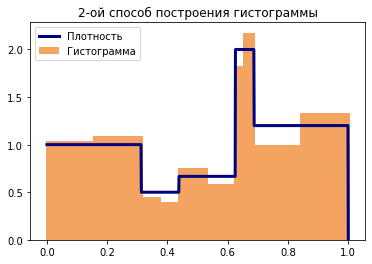

In [71]:
n_c = 10
hist_len = (x_8.max() - x_8.min())/(n_c)
mas = np.array([0, 5/32, 5/16, 6/16, 7/16, 17/32, 10/16, 21/32, 11/16, 27/32, 1])

result = np.zeros((n_c))

for i in range(len(e)):
    for j in range(n_c):
        if e[i] <= mas[j+1] and e[i] > mas[j]:
            result[j] += 1
# TODOOOOOO
def h(x):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j] / (mas[j+1] - mas[j])
    
    ans /= 1000
    return ans

#fig, ax = plt.subplots()
plt.bar(x_8, h(x_8), width = 0.01, color = "sandybrown")

# 5/16 2/16 3/16 1/16 5/16
# 1    0.5  2/3  2    6/5

def f(x):
  out = np.zeros_like(x)
  for i in range(len(x)):
    if x[i] < 0:
      out[i] = 0
    elif x[i] < 5/16:
      out[i] = 1
    elif x[i] < 7/16:
      out[i] = 0.5
    elif x[i] < 10/16:
      out[i] = 2/3
    elif x[i] < 11/16:
      out[i] = 2
    elif x[i] < 1:
      out[i] = 6/5
    else:
      out[i] = 0
  return out
#
plt.plot(x_8, f(x_8), color = "navy", linewidth = 3)
plt.legend([ "Плотность", "Гистограмма",])
plt.title("2-ой способ построения гистограммы")
plt.show()

# Задание 4

In [162]:
def N_4(len = 100):
  ans = np.zeros((len))
  for i in range(12):
    ans += np.random.uniform(size = (len))
  #for i in range(len):
  #  ans[i] -= 6
  ans -= 6
  return ans 

In [85]:
def N_4_1(len = 100):
  ans = np.sqrt(-2*np.log(np.random.uniform(size = (len))))*np.sin(2*np.pi*np.random.uniform(size = (len)))
  return ans

In [93]:
def N_4_2(len = 100):
  ans = np.sqrt(-2*np.log(np.random.uniform(size = (len))))*np.cos(2*np.pi*np.random.uniform(size = (len)))
  return ans

In [86]:
print(N_4_1())

[-0.65672483 -0.19002812 -0.09655433 -0.97999808 -1.41891473 -0.36288527
  0.11813498 -0.77690378 -0.11811174 -1.63826361 -0.45176388  0.74970595
  2.67171594 -0.79062181  0.94229061 -0.86431671  0.46778473 -1.02373499
 -0.65811882 -1.13002411  2.65516756 -0.08557575  0.3955766   0.63019232
 -0.80494166 -0.48584382 -0.34830015 -0.51287876 -0.02162402  0.25914357
 -2.17939221 -0.09682027 -0.50635163  0.38294298  0.10042276 -1.24228168
 -0.50834371 -1.0296984  -0.60310654 -0.44414183 -0.38261082  0.12095812
  0.27764592 -0.26127051  0.4537794   0.23988628  0.54229793  0.51149725
  0.3017292  -0.67559157 -0.206341    0.01798934 -0.40451891 -0.01203886
  0.5976849  -1.15457521  1.17737218 -0.33053399 -1.23796535  0.05764036
 -0.80377021  0.77663966  1.1042739   1.39252391 -0.57521999 -1.59674722
 -0.35763454  1.97817786  1.43313536 -0.00689865  0.84243824  0.11386793
  0.7623641  -0.71144363 -0.74629083 -1.21776604  1.19979505  0.3328136
 -0.33818259  1.29599223 -0.91615243 -0.68682783 -1.

In [172]:
n_4 = N_4()
n_4_1 = N_4_1()
n_4_2 = N_4_2()
n_theor = np.random.normal(size = (100))

In [89]:
from scipy.special import erf

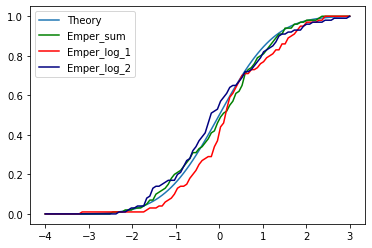

In [173]:
start1 = int(min(n_4_1.min(), n_4_2.min())) - 1
stop1 = int(max(n_4_1.max(), n_4_2.max())) + 1
start = int(min(n_4.min(), n_theor.min())) - 1
stop = int(max(n_4.max(), n_theor.max())) + 1
start = min(start, start1)
stop = max(stop, stop1)
x = np.linspace(start = start, stop = stop, num = 100)

y_normal = lambda x: 1/2 * (1 + erf(x/(np.sqrt(2))))
def emper(x, c = n_4):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

#y_emp_c = lambda x: emper(x)
plt.plot(x, y_normal(x))
plt.plot(x, emper(x), color = 'green')
plt.plot(x, emper(x, c = n_4_1), color = 'red')
plt.plot(x, emper(x, c = n_4_2), color = 'navy')
plt.legend(['Theory', 'Emper_sum', 'Emper_log_1', 'Emper_log_2'])

In [168]:
length = 37

In [169]:
n_4 = N_4(length)
n_4_1 = N_4_1(length)
n_4_2 = N_4_2(length)
n_theor = np.random.normal(size = (length))

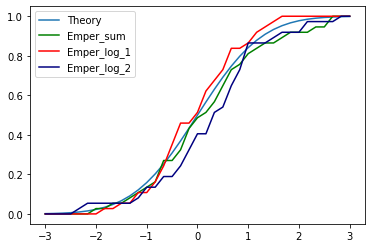

In [170]:
start1 = int(min(n_4_1.min(), n_4_2.min())) - 1
stop1 = int(max(n_4_1.max(), n_4_2.max())) + 1
start = int(min(n_4.min(), n_theor.min())) - 1
stop = int(max(n_4.max(), n_theor.max())) + 1
start = min(start, start1)
stop = max(stop, stop1)
x = np.linspace(start = start, stop = stop, num = length)

y_normal = lambda x: 1/2 * (1 + erf(x/(np.sqrt(2))))
def emper(x, c = n_4):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        for i in range(len(c)):
            if x[j] > c[i]:
                ans[j] += 1
    
    ans = ans/len(ans)
    return ans

#y_emp_c = lambda x: emper(x)
plt.plot(x, y_normal(x))
plt.plot(x, emper(x), color = 'green')
plt.plot(x, emper(x, c = n_4_1), color = 'red')
plt.plot(x, emper(x, c = n_4_2), color = 'navy')
plt.legend(['Theory', 'Emper_sum', 'Emper_log_1', 'Emper_log_2'])

## Гистограммы

In [101]:
def n(N = 100):
    return int(np.sqrt(N))
    #return 1 + int(np.log2(N))

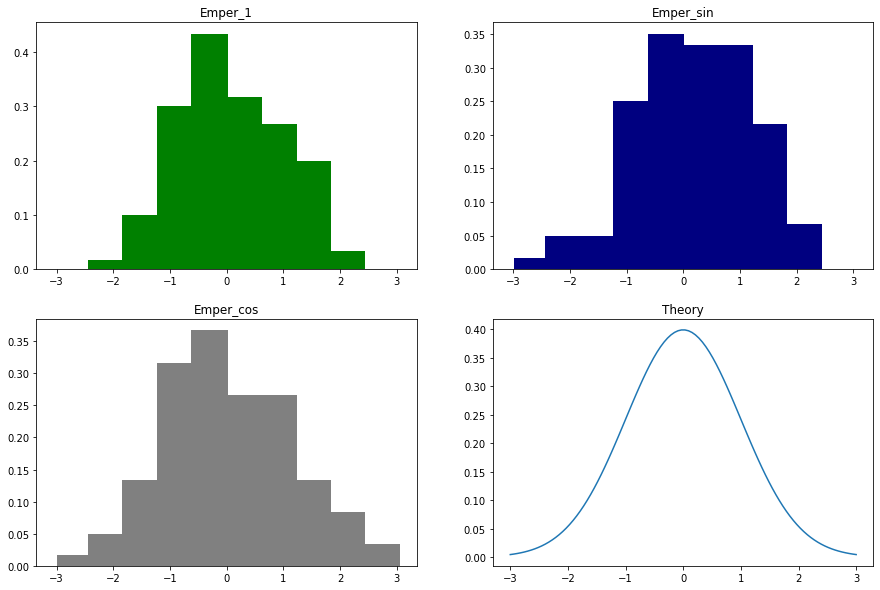

In [109]:
n_c = n()
hist_len = (x.max() - x.min())/(n_c)
mas = np.zeros((n_c+1))

for i in range(n_c):
    mas[i] = x.min() + hist_len*i
mas[n_c] = x.max()


def h(x, c = n_4):
    result = np.zeros((n_c))
    for i in range(len(c)):
      for j in range(n_c):
        if c[i] <= mas[j+1] and c[i] > mas[j]:
            result[j] += 1
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j]
    
    ans /= (hist_len*100)
    return ans

fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].bar(x, h(x), width = 0.1, color = "green")
ax[0][0].set_title('Emper_1')

ax[0][1].bar(x, h(x, c = n_4_1), width = 0.1, color = "navy")
ax[0][1].set_title('Emper_sin')

ax[1][0].bar(x, h(x, c = n_4_2), width = 0.1, color = "grey")
ax[1][0].set_title('Emper_cos')

f = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

ax[1][1].plot(x, f(x))
ax[1][1].set_title('Theory')
#plt.legend(['Emper_sum', 'Emper_log_1', 'Emper_log_2', 'Theory'])
plt.show()

## Выборочное среднее, медиана, дисперсия, коэффициент асимметрии и куртозис

### Выборочное среднее

In [111]:
E_n_4 = n_4.sum()/len(n_4)
E_n_4_1 = n_4_1.sum()/len(n_4_1)
E_n_4_2 = n_4_2.sum()/len(n_4_2)
E_n_theor = n_theor.sum()/len(n_theor)
print('N_4: ' + str(E_n_4))
print('N_4_sin: ' + str(E_n_4_1))
print('N_4_cos: ' + str(E_n_4_2))
print('N_4_theor: ' + str(E_n_theor))

N_4: 0.06743823287354424
N_4_sin: 0.1731497205988397
N_4_cos: 0.009848918467517963
N_4_theor: 0.06416669543065562


### Медиана

In [116]:
print('N_4: ' + str(np.sort(n_4)[49]))
print('N_4_sin: ' + str(np.sort(n_4_1)[49]))
print('N_4_cos: ' + str(np.sort(n_4_2)[49]))
print('N_4_theor: ' + str(np.median(n_theor)))

N_4: -0.01435072508331725
N_4_sin: 0.11449891061387367
N_4_cos: -0.027461488946569936
N_4_theor: 0.10214608156041222


### Дисперсия

In [117]:
E_n_4_sqr = (n_4**2).sum()/len(n_4)
E_n_4_1_sqr = (n_4_1**2).sum()/len(n_4_1)
E_n_4_2_sqr = (n_4_2**2).sum()/len(n_4_2)
E_n_theor_sqr = (n_theor**2).sum()/len(n_theor)
D_n_4 = E_n_4_sqr - E_n_4**2
D_n_4_1 = E_n_4_1_sqr - E_n_4_1**2
D_n_4_2 = E_n_4_2_sqr - E_n_4**2
D_n_theor = E_n_theor_sqr - E_n_theor**2
print('N_4: ' + str(D_n_4))
print('N_4_sin: ' + str(D_n_4_1))
print('N_4_cos: ' + str(D_n_4_2))
print('N_4_theor: ' + str(D_n_theor))

N_4: 0.8351830656979032
N_4_sin: 1.0071921482395259
N_4_cos: 1.2105436210892893
N_4_theor: 0.8218335093259458


### Коэффициент асимметрии (через 3-ий центральный момент)




In [124]:
def assim(x, E_x, D_x):
  tmp = ((x - E_x)/np.sqrt(D_x))**3
  return tmp.sum()/len(tmp)

In [125]:
print('N_4: ' + str(assim(n_4, E_x = E_n_4, D_x = D_n_4)))
print('N_4_sin: ' + str(assim(n_4_1, E_x = E_n_4_1, D_x = D_n_4_1)))
print('N_4_cos: ' + str(assim(n_4_2, E_x = E_n_4_2, D_x = D_n_4_2)))
print('N_4_theor: ' + str(assim(n_theor, E_x = E_n_theor, D_x = D_n_theor)))

N_4: 0.11199501145234064
N_4_sin: -0.2951201807042334
N_4_cos: 0.1313009153131552
N_4_theor: 0.039838596571254346


### Куртозис (т.эксцесса через 4-ый центральный момент)

In [126]:
def kurt(x, E_x, D_x):
  tmp = ((x - E_x)/np.sqrt(D_x))**4
  return tmp.sum()/len(tmp)

In [127]:
print('N_4: ' + str(kurt(n_4, E_x = E_n_4, D_x = D_n_4)))
print('N_4_sin: ' + str(kurt(n_4_1, E_x = E_n_4_1, D_x = D_n_4_1)))
print('N_4_cos: ' + str(kurt(n_4_2, E_x = E_n_4_2, D_x = D_n_4_2)))
print('N_4_theor: ' + str(kurt(n_theor, E_x = E_n_theor, D_x = D_n_theor)))

N_4: 2.236429458998754
N_4_sin: 2.8255505581611953
N_4_cos: 2.7363325071260283
N_4_theor: 2.3763452408850507


# Время генерации

In [140]:
import time

In [175]:
start = time.time()
n_time = N_4()
end = time.time()
print(end - start)

0.0002739429473876953


In [176]:
start = time.time()
n_time_1 = N_4_1()
end = time.time()
print(end - start)

0.0008306503295898438


In [177]:
start = time.time()
n_time_2 = N_4_2()
end = time.time()
print(end - start)

0.0009531974792480469


In [178]:
start = time.time()
n_time = N_4(10000000)
end = time.time()
print(end - start)

1.4190058708190918


In [179]:
start = time.time()
n_time_1 = N_4_1(10000000)
end = time.time()
print(end - start)

0.869420051574707


In [180]:
start = time.time()
n_time_2 = N_4_2(10000000)
end = time.time()
print(end - start)

0.8822066783905029
